In [1]:
import os
import numpy as np
import pandas as pd
import readdat as rd


In [3]:
# すべての.datファイルについて展の数を確認する
# ここでは、データの形状を確認するためにprint文を使用しています。

data_dir = "UIUC Database"
file_list = [f for f in os.listdir(data_dir) if f.endswith(".dat")]

for i, file in enumerate(file_list):
    data = data_dir + "/" + file
    print(f"Processing file {i + 1}/{len(file_list)}: {file}")
    read_airfoil_data = rd.read_airfoil(data)
    print(f"Data shape for {file}: {read_airfoil_data.shape}")
    print("\n")

    # 処理できないファイルがある場合はスキップし処理を続ける
    # 処理できないファイルはファイル名をスキップリストに追加
    if read_airfoil_data.shape[0] == 0:
        print(f"Skipping file {file} due to no data points.")
        continue


Processing file 1/1637: 2032c.dat


AttributeError: 'list' object has no attribute 'strip'

In [2]:
import ResampleUIUC as resmpl
folder = "UIUC Database"  # UIUCのdatフォルダ
dataset, names, labels = resmpl.process_uiuc_folder(folder, n_points=200)

Saved (1637, 200, 2) to airfoils_resampled.npy
Saved (1637,) to airfoils_labels.npy


In [5]:
# airfoils_resampled.npy の中身を可視化
import matplotlib.pyplot as plt

airfoildata = np.load("airfoils_resampled.npy")
print(airfoildata.shape)
print(airfoildata[0])


(1637, 200, 2)
[[ 1.00000000e+00  1.60000000e-03]
 [ 9.89948862e-01  3.77104575e-03]
 [ 9.79897725e-01  5.94209150e-03]
 [ 9.69846587e-01  8.11313724e-03]
 [ 9.59795449e-01  1.02841830e-02]
 [ 9.49743999e-01  1.24537603e-02]
 [ 9.39680566e-01  1.45670812e-02]
 [ 9.29617133e-01  1.66804022e-02]
 [ 9.19553700e-01  1.87937231e-02]
 [ 9.09490267e-01  2.09070440e-02]
 [ 8.99425595e-01  2.30143066e-02]
 [ 8.89340410e-01  2.50212584e-02]
 [ 8.79255225e-01  2.70282102e-02]
 [ 8.69170040e-01  2.90351620e-02]
 [ 8.59084855e-01  3.10421138e-02]
 [ 8.48999670e-01  3.30490656e-02]
 [ 8.38914486e-01  3.50560174e-02]
 [ 8.28829301e-01  3.70629692e-02]
 [ 8.18744116e-01  3.90699209e-02]
 [ 8.08658931e-01  4.10768727e-02]
 [ 7.98569282e-01  4.30603906e-02]
 [ 7.88452533e-01  4.49016390e-02]
 [ 7.78335784e-01  4.67428873e-02]
 [ 7.68219035e-01  4.85841357e-02]
 [ 7.58102286e-01  5.04253840e-02]
 [ 7.47985536e-01  5.22666324e-02]
 [ 7.37868787e-01  5.41078807e-02]
 [ 7.27752038e-01  5.59491291e-02]
 [ 7.

In [6]:
# airfoils_labels.npy の中身を可視化
import matplotlib.pyplot as plt

airfoil_labels = np.load("airfoils_labels.npy")
print(airfoil_labels.shape)
print(airfoil_labels[:30])

(1637,)
['Unknown' 'Unknown' 'Unknown' 'Unknown' ' Drela AG' ' Drela AG'
 ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG'
 ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG'
 ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG'
 ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG']


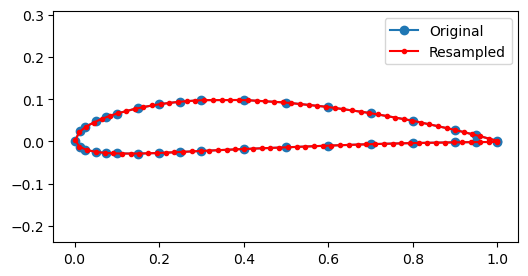

In [4]:
import ResampleUIUC as resmpl
import matplotlib.pyplot as plt

data_dir = "UIUC Database"
filename = "naca4412.dat"
data = data_dir + "/" + filename

coords = resmpl.load_airfoil_dat(data)
coords_resampled = resmpl.normalize_and_resample(coords, n_points=100)

plt.figure(figsize=(6,3))
plt.plot(coords[:,0], coords[:,1], 'o-', label='Original')
plt.plot(coords_resampled[:,0], coords_resampled[:,1], 'r.-', label='Resampled')
plt.axis('equal')
plt.legend()
plt.show()


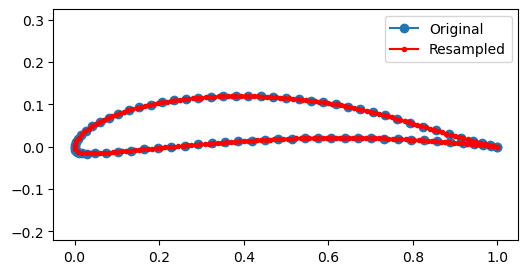

In [5]:
data_dir = "UIUC Database"
filename = "DAE31.dat"
data = data_dir + "/" + filename

coords = resmpl.load_airfoil_dat(data)
coords_resampled = resmpl.normalize_and_resample(coords, n_points=200)

plt.figure(figsize=(6,3))
plt.plot(coords[:,0], coords[:,1], 'o-', label='Original')
plt.plot(coords_resampled[:,0], coords_resampled[:,1], 'r.-', label='Resampled')
plt.axis('equal')
plt.legend()
plt.show()


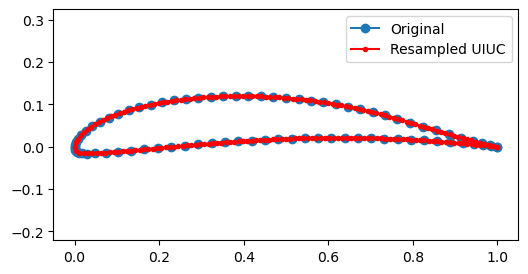

In [6]:
import ResampleUIUC as resmpl
import matplotlib.pyplot as plt

data_dir = "UIUC Database"
filename = "DAE31.dat"
data = data_dir + "/" + filename

coords = resmpl.load_airfoil_dat(data)
coords_resampled = resmpl.normalize_and_resample(coords, n_points=200)
coords_resampled_uiuc = resmpl.normalize_and_resample_uiuc(coords, n_points=200)


plt.figure(figsize=(6,3))
plt.plot(coords[:,0], coords[:,1], 'o-', label='Original')
plt.plot(coords_resampled_uiuc[:,0], coords_resampled_uiuc[:,1], 'r.-', label='Resampled UIUC')
plt.axis('equal')
plt.legend()
plt.show()                                  


補間点数は200あれば十分

In [5]:
import ResampleUIUC as resmpl
# ラベル抽出のテスト
label = resmpl.get_airfoil_label("naca4412.dat")
print(label)  # "NACA"

NACA


In [13]:

maker_list = ["NACA", "DAE", "e", "UIUC", "Boeing", "NASA", "mel", "Boeing-UIUC", "Boeing-NASA","ME"]

# ラベル抽出のテスト
for maker in maker_list:
    filename = f"{maker.lower()}_airfoil.dat"
    label = resmpl.get_airfoil_label(filename)
    print(f"Filename: {filename}, Extracted Label: {label}")

Filename: naca_airfoil.dat, Extracted Label: NACA
Filename: dae_airfoil.dat, Extracted Label: Unknown
Filename: e_airfoil.dat, Extracted Label: Eppler
Filename: uiuc_airfoil.dat, Extracted Label: Unknown
Filename: boeing_airfoil.dat, Extracted Label: Unknown
Filename: nasa_airfoil.dat, Extracted Label: Unknown
Filename: mel_airfoil.dat, Extracted Label: Unknown
Filename: boeing-uiuc_airfoil.dat, Extracted Label: Unknown
Filename: boeing-nasa_airfoil.dat, Extracted Label: Unknown
Filename: me_airfoil.dat, Extracted Label: Unknown
